In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

In [ ]:
path = kagglehub.dataset_download("l3llff/-elden-ring-weapons")
csv_file = f"{path}/elden_ring_weapon.csv"
df = pd.read_csv(csv_file)

In [ ]:
cols_to_convert = ['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Phy.1', 'Mag.1', 'Fir.1', 'Lit.1', 'Hol.1', 'Bst', 'Rst']
df[cols_to_convert] = df[cols_to_convert].replace('-', 0)
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)

In [ ]:
df['Total_Damage'] = df[['Phy', 'Mag', 'Fir', 'Lit', 'Hol']].sum(axis=1)

<ipython-input-9-58dbc36e659c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_type_counts.values, y=weapon_type_counts.index, palette='viridis')


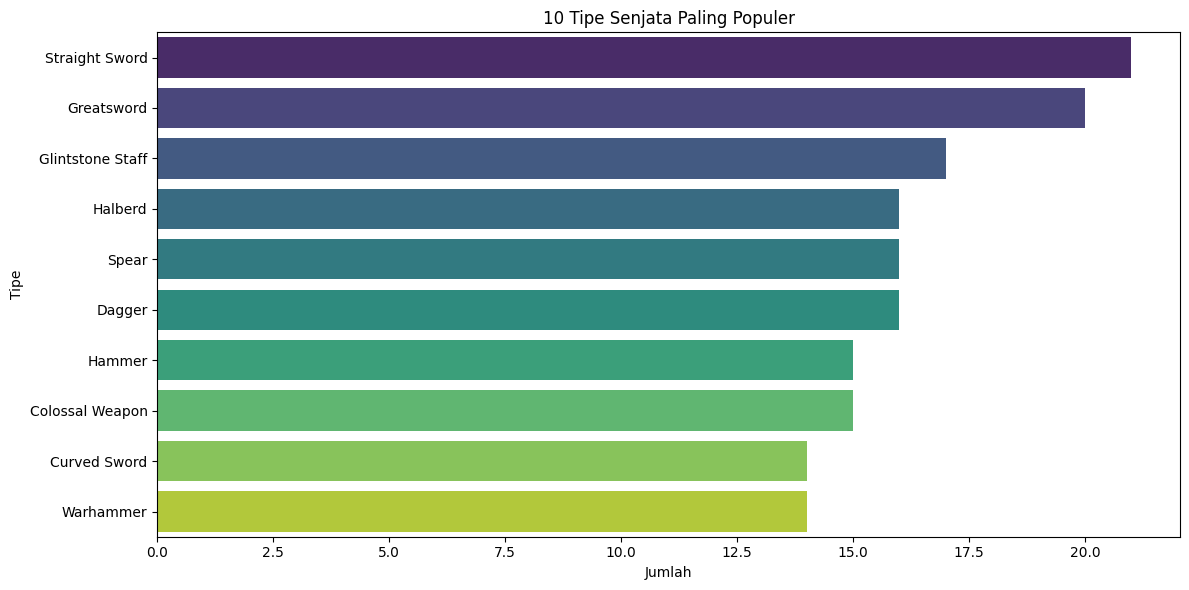

In [ ]:
plt.figure(figsize=(12, 6))
weapon_type_counts = df['Type'].value_counts().head(10)
sns.barplot(x=weapon_type_counts.values, y=weapon_type_counts.index, palette='viridis')
plt.title('10 Tipe Senjata Paling Populer')
plt.xlabel('Jumlah')
plt.ylabel('Tipe')
plt.tight_layout()
plt.show()

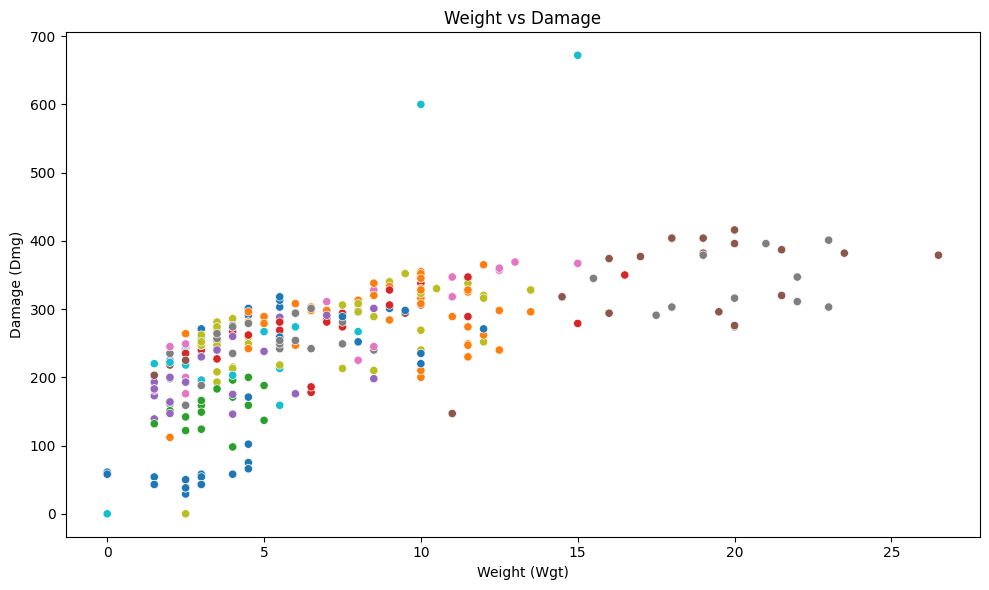

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wgt', y='Phy', data=df, hue='Type', palette='tab10', legend=False)
plt.title('Weight vs Damage')
plt.xlabel('Weight (Wgt)')
plt.ylabel('Damage (Dmg)')
plt.tight_layout()
plt.show()

<ipython-input-14-cd6a5d960b83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Damage', y='Name', data=top_damage_weapons, palette='magma')


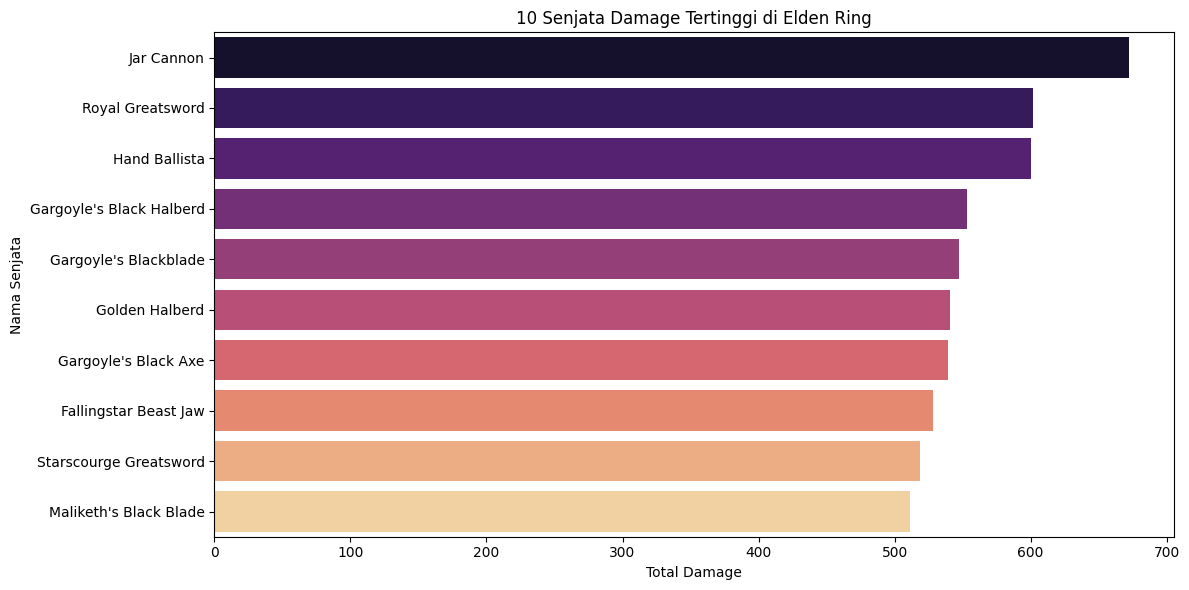

In [ ]:
top_damage_weapons = df.nlargest(10, 'Total_Damage')
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Damage', y='Name', data=top_damage_weapons, palette='magma')
plt.title('10 Senjata Damage Tertinggi di Elden Ring')
plt.xlabel('Total Damage')
plt.ylabel('Nama Senjata')
plt.tight_layout()
plt.show()

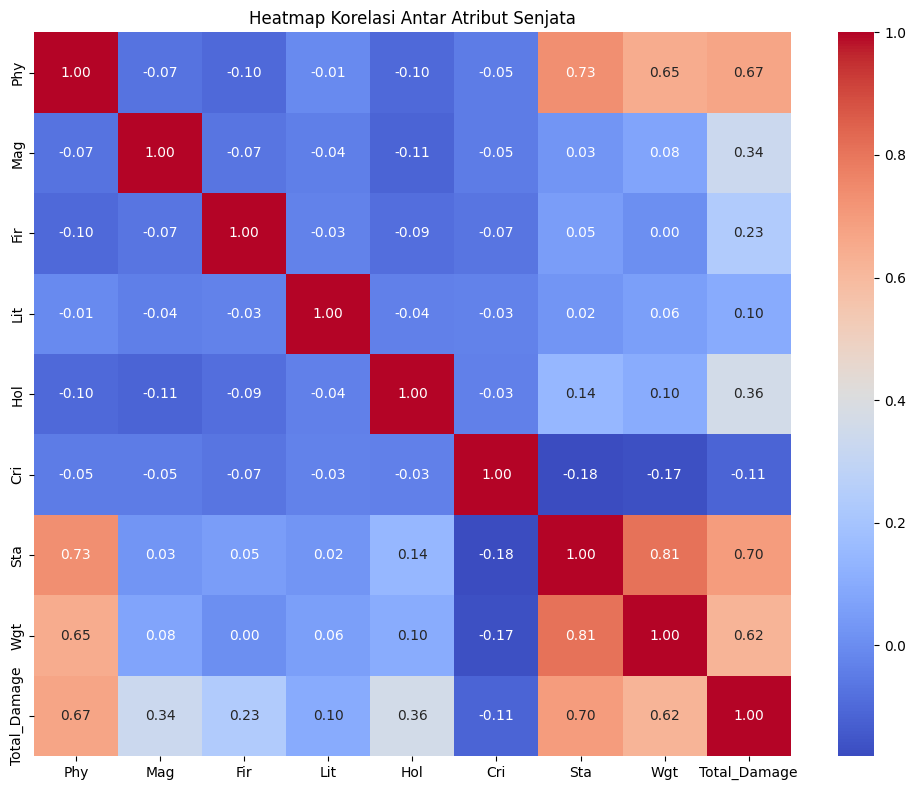

In [ ]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta', 'Wgt', 'Total_Damage']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Atribut Senjata')
plt.tight_layout()
plt.show()

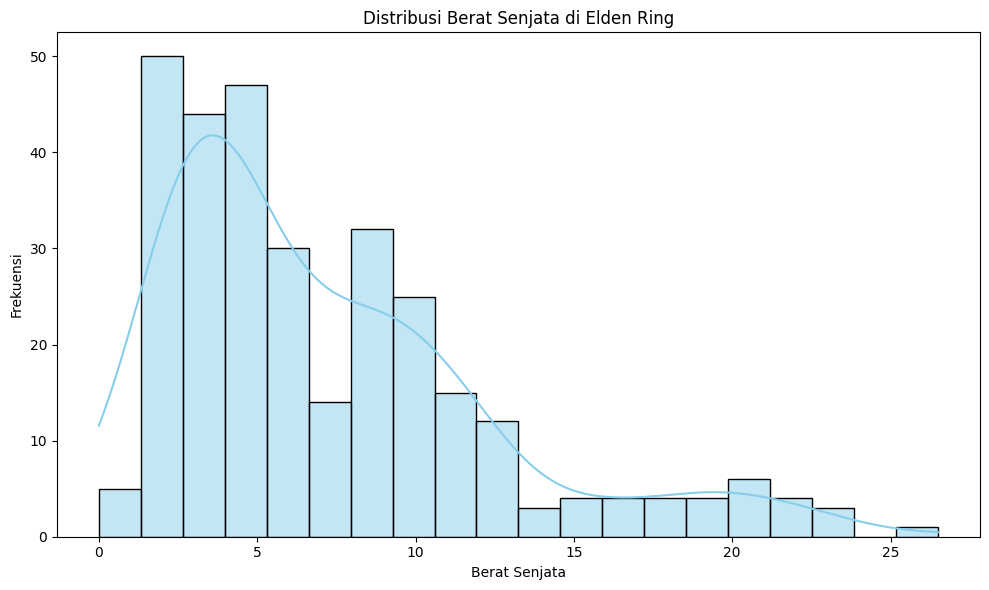

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Wgt'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Berat Senjata di Elden Ring')
plt.xlabel('Berat Senjata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

<ipython-input-17-3cf115c55e66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_damage_per_type.values, y=avg_damage_per_type.index, palette='cubehelix')


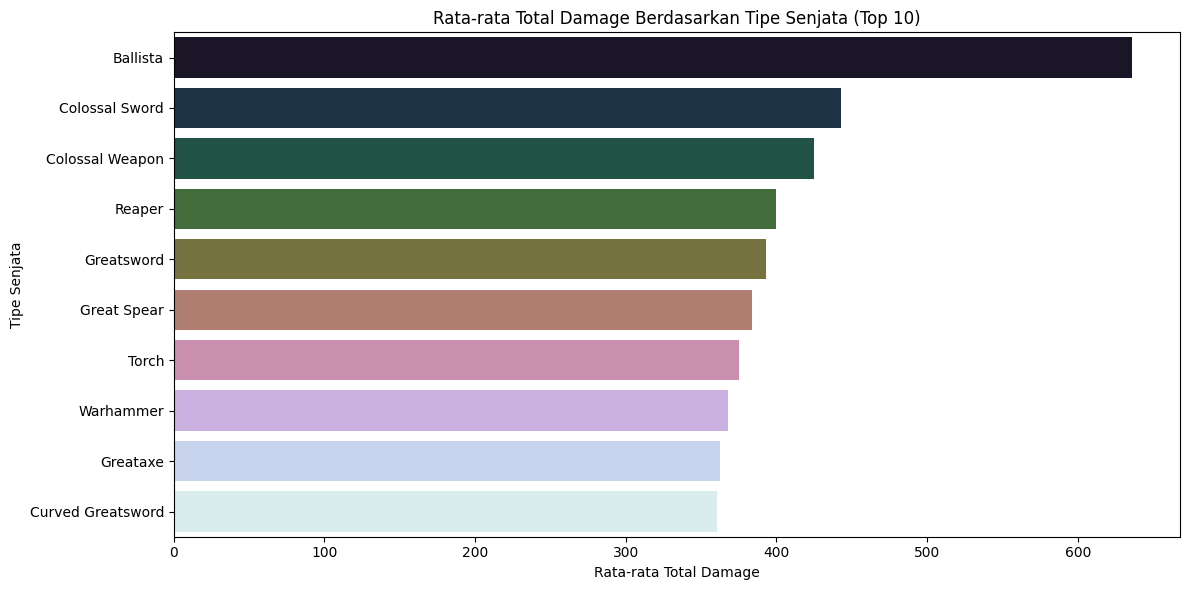

In [ ]:
plt.figure(figsize=(12, 6))
avg_damage_per_type = df.groupby('Type')['Total_Damage'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_damage_per_type.values, y=avg_damage_per_type.index, palette='cubehelix')
plt.title('Rata-rata Total Damage Berdasarkan Tipe Senjata (Top 10)')
plt.xlabel('Rata-rata Total Damage')
plt.ylabel('Tipe Senjata')
plt.tight_layout()
plt.show()
